In [1]:
# A code-along to get to grips with Keras at a Bath ML meetup on June 3rd, 2018.

## Uses Keras to build a Convolutional NN to predict users from their walking accelorometer data.

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv1D, MaxPooling1D, Flatten

np.random.seed(2018)

Using TensorFlow backend.


In [3]:
# Loading walking data
walking = np.load("data/walking_data.npy")

In [4]:
def plot_series(series):
    plt.plot(series[:, 0], color="red")
    plt.plot(series[:, 1], color="green")
    plt.plot(series[:, 2], color="blue")

In [5]:
plot_series(walking[100, :, :])

In [6]:
# Load walking data
walking_labels = np.load("data/walking_labels.npy")

# Generate indices to take train, val and test data from
m = walking.shape[0]
indices = [x for x in range(m)]
np.random.shuffle(indices)
train_indices = indices[int(m*0.6):]
val_indices = indices[int(m*0.6):int(m*0.8)]
test_indices = indices[:int(m*0.8)]

# Split into input and labels based on the generated indices.
X_train = walking[train_indices,:,:]
X_val = walking[val_indices,:,:]
X_test = walking[test_indices,:,:]

y_train = to_categorical(walking_labels[train_indices])
y_val = to_categorical(walking_labels[val_indices])
y_test = to_categorical(walking_labels[test_indices])

In [7]:
model = Sequential()

model.add(Conv1D(filters=30, kernel_size=40, strides=4, activation="relu", input_shape=(260, 3)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=30, kernel_size=10, activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=30, kernel_size=4, activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(100, activation="sigmoid"))
model.add(Dense(15, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 56, 30)            3630      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 28, 30)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19, 30)            9030      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 30)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 6, 30)             3630      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 3, 30)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 90)                0         
__________

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
result = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val))

Train on 2717 samples, validate on 1358 samples
Epoch 1/50
2717/2717 [==============================] - 3s 1ms/step - loss: 2.6861 - acc: 0.1299 - val_loss: 2.4512 - val_acc: 0.2342
Epoch 2/50
2717/2717 [==============================] - 2s 622us/step - loss: 2.1331 - acc: 0.3596 - val_loss: 1.6881 - val_acc: 0.4462
Epoch 3/50
2717/2717 [==============================] - 2s 649us/step - loss: 1.4354 - acc: 0.5642 - val_loss: 1.1724 - val_acc: 0.6848
Epoch 4/50
2717/2717 [==============================] - 2s 694us/step - loss: 1.0743 - acc: 0.6989 - val_loss: 0.9197 - val_acc: 0.7629
Epoch 5/50
2717/2717 [==============================] - 2s 615us/step - loss: 0.8828 - acc: 0.7582 - val_loss: 0.7554 - val_acc: 0.7828
Epoch 6/50
2717/2717 [==============================] - 2s 605us/step - loss: 0.7393 - acc: 0.8024 - val_loss: 0.6555 - val_acc: 0.8181
Epoch 7/50
2717/2717 [==============================] - 2s 613us/step - loss: 0.6523 - acc: 0.8204 - val_loss: 0.5768 - val_acc: 0.8483
Ep

In [10]:
# Prediction and reporting
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)

In [11]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       415
          1       0.92      0.94      0.93       345
          2       0.93      0.89      0.91       255
          3       0.96      0.94      0.95       453
          4       0.90      0.87      0.88       267
          5       0.97      0.95      0.96       448
          6       0.78      0.91      0.84       259
          7       0.88      0.91      0.89       341
          8       0.94      0.93      0.94       406
          9       0.94      0.93      0.94       357
         10       0.96      0.98      0.97       426
         11       0.89      0.88      0.89       332
         12       0.96      0.98      0.97       384
         13       0.96      0.93      0.94       330
         14       0.95      0.92      0.93       415

avg / total       0.93      0.93      0.93      5433



In [12]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[395   1   1   6   1   0   7   0   0   1   1   0   0   1   1]
 [  0 324   0   0   0   0   6   7   2   0   0   0   0   6   0]
 [  0   1 228   0  11   0   7   3   1   1   2   0   1   0   0]
 [  9   0   0 427   4   3   4   0   2   0   0   0   0   2   2]
 [  0   0  10   0 232   0   5   0   5   1  13   0   0   0   1]
 [  0   0   0   5   0 427   3   0   9   0   0   0   0   1   3]
 [  1   3   0   2   3   0 235   1   1   6   0   6   0   0   1]
 [  0   3   1   0   0   0   0 310   0   2   0  20   2   2   1]
 [  0   0   0   1   2   9   6   0 379   4   0   0   0   0   5]
 [  0   1   1   0   0   0   8   1   0 333   0   5   4   1   3]
 [  0   0   0   2   4   0   0   0   0   1 419   0   0   0   0]
 [  0   5   0   0   0   0   4  29   0   1   0 293   0   0   0]
 [  0   0   0   0   0   0   1   0   1   0   0   3 376   0   3]
 [  1  12   0   0   0   0   7   2   1   1   0   0   0 306   0]
 [  0   3   4   0   2   1   8   0   3   3   0   1   9   0 381]]


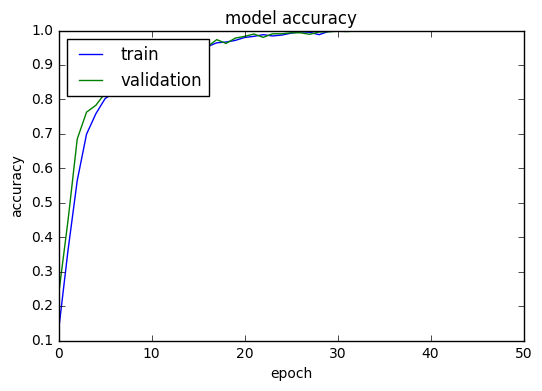

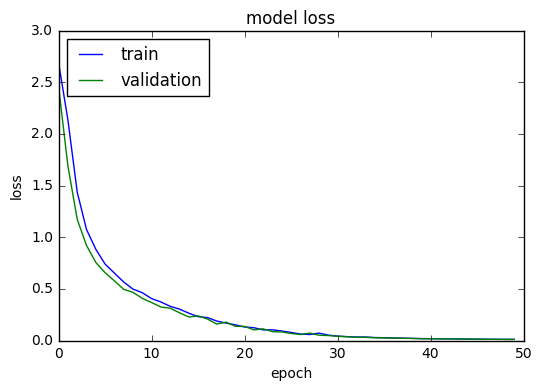

In [13]:
%matplotlib inline
#  "Accuracy"
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
def plot_filter(model, layer, k):
    weights = model.layers[layer].get_weights()[0][:, :, k]
    plot_series(weights)

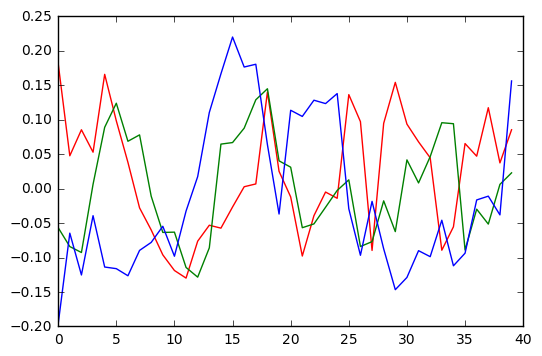

In [15]:
plot_filter(model, 0, 4)

In [16]:
def plot_filter_corr(model, layer, k):
    weights = model.layers[layer].get_weights()[0][:, :, k]
    corrs = np.apply_along_axis(lambda y: np.correlate(y, y, mode="full"), 0, weights)
    plot_series(corrs[corrs.shape[0]//2:, :])

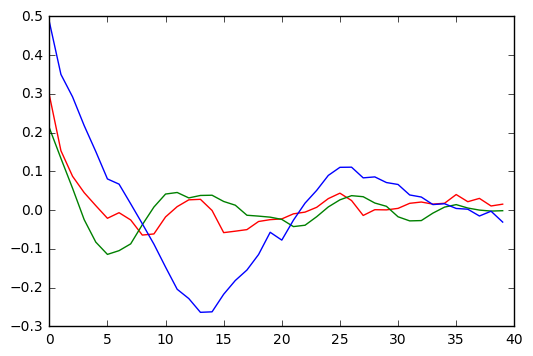

In [17]:
plot_filter_corr(model, 0, 4)